In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from datetime import datetime

ModuleNotFoundError: No module named 'pandas'

### 1. Reading data and merging tables

In [2]:
nyc_sights = pd.read_csv('nyc_sightings cleaned updated.csv')
nyc_sights.columns = map(str.lower, nyc_sights.columns)
nyc_sights.head(30)

,time of reported rat sighting,location type,incident zip,incident address,city,resolution action updated date,borough,x coordinate (state plane),y coordinate (state plane),latitude,longitude,location
0,9:38:29 AM,Other (Explain Below),11432.0,NaN,JAMAICA,9:45:41 AM,QUEENS,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)"
1,7:09:56 AM,Catch Basin/Sewer,11204.0,NaN,BROOKLYN,7:17:22 AM,BROOKLYN,990421.0,160893.0,40.608288,-73.977775,"(40.60828832742201, -73.97777515791093)"
2,9:04:46 AM,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,FOREST HILLS,9:14:11 AM,QUEENS,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)"
3,6:27:59 PM,3+ Family Mixed Use Building,11233.0,1040 HERKIMER STREET,BROOKLYN,6:37:44 PM,BROOKLYN,1006739.0,186285.0,40.677957,-73.918921,"(40.67795748580213, -73.91892129635086)"
4,12:50:16 PM,3+ Family Apt. Building,10034.0,241 SHERMAN AVENUE,NEW YORK,1:00:54 PM,MANHATTAN,1006543.0,254798.0,40.866008,-73.919401,"(40.86600810878767, -73.9194006525354)"
5,1:07:42 PM,3+ Family Apt. Building,10452.0,1270 GERARD AVENUE,BRONX,1:13:07 PM,BRONX,1006574.0,244239.0,40.837027,-73.919324,"(40.83702671984958, -73.91932373285213)"
6,12:09:47 PM,Government Building,11377.0,50-03 BROADWAY,WOODSIDE,12:25:16 PM,QUEENS,1009299.0,214196.0,40.754560,-73.909588,"(40.75455957560568, -73.90958797579815)"
7,1:37:04 PM,1-2 Family Dwelling,11236.0,764 EAST 82 STREET,BROOKLYN,1:51:46 PM,BROOKLYN,1008652.0,171260.0,40.636712,-73.912079,"(40.636712112318, -73.91207880680062)"
8,11:06:30 PM,3+ Family Apt. Building,10459.0,1083 LONGFELLOW AVENUE,BRONX,11:13:20 PM,BRONX,1015294.0,240146.0,40.825766,-73.887830,"(40.8257662713477, -73.88782966595178)"
9,12:49:49 PM,3+ Family Apt. Building,10455.0,732 UNION AVENUE,BRONX,12:59:52 PM,BRONX,1010915.0,237068.0,40.817332,-73.903664,"(40.817332341679716, -73.9036643897699)"


In [3]:
nyc_sights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216938 entries, 0 to 216937
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   time of reported rat sighting   216938 non-null  object 
 1   location type                   216926 non-null  object 
 2   incident zip                    216508 non-null  float64
 3   incident address                206003 non-null  object 
 4   city                            213507 non-null  object 
 5   resolution action updated date  208656 non-null  object 
 6   borough                         216934 non-null  object 
 7   x coordinate (state plane)      214753 non-null  float64
 8   y coordinate (state plane)      214755 non-null  float64
 9   latitude                        214753 non-null  float64
 10  longitude                       214753 non-null  float64
 11  location                        214753 non-null  object 
dtypes: float64(5), o

In [4]:
#changing the values of borough in the nyc_sights to lower case so that the data can merge with nyc_pop
nyc_sights['borough'] = nyc_sights['borough'].str.lower()

In [5]:
nyc_sights.head(5)

,time of reported rat sighting,location type,incident zip,incident address,city,resolution action updated date,borough,x coordinate (state plane),y coordinate (state plane),latitude,longitude,location
0,9:38:29 AM,Other (Explain Below),11432.0,NaN,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)"
1,7:09:56 AM,Catch Basin/Sewer,11204.0,NaN,BROOKLYN,7:17:22 AM,brooklyn,990421.0,160893.0,40.608288,-73.977775,"(40.60828832742201, -73.97777515791093)"
2,9:04:46 AM,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,FOREST HILLS,9:14:11 AM,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)"
3,6:27:59 PM,3+ Family Mixed Use Building,11233.0,1040 HERKIMER STREET,BROOKLYN,6:37:44 PM,brooklyn,1006739.0,186285.0,40.677957,-73.918921,"(40.67795748580213, -73.91892129635086)"
4,12:50:16 PM,3+ Family Apt. Building,10034.0,241 SHERMAN AVENUE,NEW YORK,1:00:54 PM,manhattan,1006543.0,254798.0,40.866008,-73.919401,"(40.86600810878767, -73.9194006525354)"


In [6]:
nyc_pop = pd.read_csv('nyc_projected_pop as is.csv')
nyc_pop.columns = map(str.lower, nyc_pop.columns)
nyc_pop.head(10)

,age group,borough,2010,% of total borough population - 2010,2020,% of total borough population - 2020,2030,% of total borough population - 2030,2040,% of total borough population - 2040,change in number - 2010-2020,change in percent - 2010-2020,change in number - 2020-2030,change in percent - 2020-2030,change in number - 2030-2040,change in percent - 2030-2040,change in number - 2010-2040,change in percent - 2010-2040
0,Total,New York City,"8,242,624",100.00%,"8,550,971",100.00%,"8,821,027",100.00%,"9,025,145",100.00%,"308,347",3.74%,"270,056",3.16%,"204,118",2.31%,"782,521",9.49%
1,Total,Bronx,"1,385,108",100.00%,"1,446,788",100.00%,"1,518,998",100.00%,"1,579,245",100.00%,"61,680",4.45%,"72,210",4.99%,"60,247",3.97%,"194,137",14.02%
2,Total,Brooklyn,"2,552,911",100.00%,"2,648,452",100.00%,"2,754,009",100.00%,"2,840,525",100.00%,"95,541",3.74%,"105,557",3.99%,"86,516",3.14%,"287,614",11.27%
3,Total,Manhattan,"1,585,873",100.00%,"1,638,281",100.00%,"1,676,720",100.00%,"1,691,617",100.00%,"52,408",3.30%,"38,439",2%,"14,897",0.89%,"105,744",6.67%
4,Total,Queens,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%
5,Total,Staten Island,"468,730",100.00%,"487,155",100.00%,"497,749",100.00%,"501,109",100.00%,"18,425",3.93%,"10,594",2.17%,"3,360",0.68%,"32,379",6.91%
6,School-Age (5 to17),New York City,"1,260,400",15.29%,"1,282,814",15.00%,"1,347,036",15.27%,"1,342,097",14.87%,"22,415",1.78%,"64,222",5.01%,"-4,939",-0.37%,"81,697",6.48%
7,School-Age (5 to17),Bronx,"265,052",19.14%,"259,013",17.90%,"277,830",18.29%,"281,688",17.84%,"-6,039",-2.28%,"18,817",7.26%,"3,858",1.39%,"16,636",6.28%
8,School-Age (5 to17),Brooklyn,"424,704",16.64%,"441,049",16.65%,"461,688",16.76%,"454,949",16.02%,"16,345",3.85%,"20,639",4.68%,"-6,739",-1.46%,"30,245",7.12%
9,School-Age (5 to17),Manhattan,"157,856",9.95%,"162,931",9.95%,"177,440",10.58%,"170,114",10.06%,"5,075",3.21%,"14,509",8.90%,"-7,326",-4.13%,"12,258",7.77%


In [7]:
nyc_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age group                             18 non-null     object
 1   borough                               18 non-null     object
 2   2010                                  18 non-null     object
 3   % of total borough population - 2010  18 non-null     object
 4   2020                                  18 non-null     object
 5   % of total borough population - 2020  18 non-null     object
 6   2030                                  18 non-null     object
 7   % of total borough population - 2030  18 non-null     object
 8   2040                                  18 non-null     object
 9   % of total borough population - 2040  18 non-null     object
 10  change in number - 2010-2020          18 non-null     object
 11  change in percent - 2010-2020     

In [8]:
#changing the values of borough in the nyc_pop to lower case so that the data can merge with nyc_sights
nyc_pop['borough'] = nyc_pop['borough'].str.lower()

In [9]:
nyc_pop.head(5)

,age group,borough,2010,% of total borough population - 2010,2020,% of total borough population - 2020,2030,% of total borough population - 2030,2040,% of total borough population - 2040,change in number - 2010-2020,change in percent - 2010-2020,change in number - 2020-2030,change in percent - 2020-2030,change in number - 2030-2040,change in percent - 2030-2040,change in number - 2010-2040,change in percent - 2010-2040
0,Total,new york city,"8,242,624",100.00%,"8,550,971",100.00%,"8,821,027",100.00%,"9,025,145",100.00%,"308,347",3.74%,"270,056",3.16%,"204,118",2.31%,"782,521",9.49%
1,Total,bronx,"1,385,108",100.00%,"1,446,788",100.00%,"1,518,998",100.00%,"1,579,245",100.00%,"61,680",4.45%,"72,210",4.99%,"60,247",3.97%,"194,137",14.02%
2,Total,brooklyn,"2,552,911",100.00%,"2,648,452",100.00%,"2,754,009",100.00%,"2,840,525",100.00%,"95,541",3.74%,"105,557",3.99%,"86,516",3.14%,"287,614",11.27%
3,Total,manhattan,"1,585,873",100.00%,"1,638,281",100.00%,"1,676,720",100.00%,"1,691,617",100.00%,"52,408",3.30%,"38,439",2%,"14,897",0.89%,"105,744",6.67%
4,Total,queens,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%


In [10]:
nyc_pop['borough'].value_counts()

new york city       3
   bronx            3
   brooklyn         3
   manhattan        3
   queens           3
   staten island    3
Name: borough, dtype: int64

In [11]:
#The values for borough in nyc_pop dataframe have spaces before them, remove the spaces to perform merging.
nyc_pop['borough'].replace(to_replace =['   bronx'], value = ['bronx'], inplace = True)
nyc_pop['borough'].replace(to_replace =['   brooklyn'], value = ['brooklyn'], inplace = True)
nyc_pop['borough'].replace(to_replace =['   manhattan'], value = ['manhattan'], inplace = True)
nyc_pop['borough'].replace(to_replace =['   queens'], value = ['queens'], inplace = True)
nyc_pop['borough'].replace(to_replace =['   staten island'], value = ['staten island'], inplace = True)

In [12]:
nyc_pop['borough'].value_counts()

new york city    3
bronx            3
brooklyn         3
manhattan        3
queens           3
staten island    3
Name: borough, dtype: int64

In [13]:
#merging population data and sightings data.
nyc_data = pd.merge(nyc_sights, nyc_pop, on = 'borough')
nyc_data.head()

,time of reported rat sighting,location type,incident zip,incident address,city,resolution action updated date,borough,x coordinate (state plane),y coordinate (state plane),latitude,longitude,location,age group,2010,% of total borough population - 2010,2020,% of total borough population - 2020,2030,% of total borough population - 2030,2040,% of total borough population - 2040,change in number - 2010-2020,change in percent - 2010-2020,change in number - 2020-2030,change in percent - 2020-2030,change in number - 2030-2040,change in percent - 2030-2040,change in number - 2010-2040,change in percent - 2010-2040
0,9:38:29 AM,Other (Explain Below),11432.0,NaN,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",Total,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%
1,9:38:29 AM,Other (Explain Below),11432.0,NaN,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",School-Age (5 to17),"331,926",14.75%,"341,062",14.64%,"350,544",14.77%,"355,340",14.73%,"9,137",2.75%,"9,482",2.78%,"4,796",1.37%,"23,414",7.05%
2,9:38:29 AM,Other (Explain Below),11432.0,NaN,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",65 and over,"288,219",12.81%,"325,300",13.96%,"370,214",15.60%,"377,060",15.63%,"37,081",12.87%,"44,914",14%,"6,846",1.85%,"88,841",30.82%
3,9:04:46 AM,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,FOREST HILLS,9:14:11 AM,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)",Total,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%
4,9:04:46 AM,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,FOREST HILLS,9:14:11 AM,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)",School-Age (5 to17),"331,926",14.75%,"341,062",14.64%,"350,544",14.77%,"355,340",14.73%,"9,137",2.75%,"9,482",2.78%,"4,796",1.37%,"23,414",7.05%


In [14]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650757 entries, 0 to 650756
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   time of reported rat sighting         650757 non-null  object 
 1   location type                         650721 non-null  object 
 2   incident zip                          649500 non-null  float64
 3   incident address                      617979 non-null  object 
 4   city                                  640512 non-null  object 
 5   resolution action updated date        625938 non-null  object 
 6   borough                               650757 non-null  object 
 7   x coordinate (state plane)            644232 non-null  float64
 8   y coordinate (state plane)            644238 non-null  float64
 9   latitude                              644232 non-null  float64
 10  longitude                             644232 non-null  float64
 11  

In [15]:
nyc_data.borough.value_counts()

brooklyn         234957
manhattan        172488
bronx            120336
queens            96663
staten island     26313
Name: borough, dtype: int64

In [16]:
nyc_climate = pd.read_csv('Climate_and_Health_data cleaned.csv')
nyc_climate.columns = map(str.lower, nyc_climate.columns)
nyc_climate.head(10)

,title,indicator_name,neighborhood,% reported good or excellent
0,Climate and Health,Homes near structures rated good or excellent,Kingsbridge - Riverdale,73.6
1,Climate and Health,Homes near structures rated good or excellent,Northeast Bronx,78.6
2,Climate and Health,Homes near structures rated good or excellent,Fordham - Bronx Pk,57.7
3,Climate and Health,Homes near structures rated good or excellent,Pelham - Throgs Neck,71.4
4,Climate and Health,Homes near structures rated good or excellent,Crotona -Tremont,39.1
5,Climate and Health,Homes near structures rated good or excellent,High Bridge - Morrisania,36.9
6,Climate and Health,Homes near structures rated good or excellent,Hunts Point - Mott Haven,44.2
7,Climate and Health,Homes near structures rated good or excellent,Greenpoint,86.7
8,Climate and Health,Homes near structures rated good or excellent,Downtown - Heights - Slope,79.6
9,Climate and Health,Homes near structures rated good or excellent,Bedford Stuyvesant - Crown Heights,59.1


In [17]:
nyc_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3444 entries, 0 to 3443
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         3444 non-null   object 
 1   indicator_name                3444 non-null   object 
 2   neighborhood                  3444 non-null   object 
 3   % reported good or excellent  3418 non-null   float64
dtypes: float64(1), object(3)
memory usage: 107.8+ KB


In [18]:
nyc_Asthma = pd.read_csv('Asthma_and_the_Environment_data CLEANED.csv')
nyc_Asthma.columns = map(str.lower, nyc_Asthma.columns)
nyc_Asthma.head(10)

,asthma and the environment,neighborhood,% reported
0,Asthma and the Environment,Kingsbridge - Riverdale,5.1
1,Asthma and the Environment,Northeast Bronx,5.9
2,Asthma and the Environment,Fordham - Bronx Pk,4.8
3,Asthma and the Environment,Pelham - Throgs Neck,6.1
4,Asthma and the Environment,Crotona -Tremont,8.8
5,Asthma and the Environment,High Bridge - Morrisania,8.8
6,Asthma and the Environment,Hunts Point - Mott Haven,8.8
7,Asthma and the Environment,Greenpoint,3.1
8,Asthma and the Environment,Downtown - Heights - Slope,6.5
9,Asthma and the Environment,Bedford Stuyvesant - Crown Heights,5.9


In [19]:
nyc_Asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   asthma and the environment  7182 non-null   object 
 1   neighborhood                7182 non-null   object 
 2   % reported                  7095 non-null   float64
dtypes: float64(1), object(2)
memory usage: 168.5+ KB


In [20]:
climate_asthma = pd.merge(nyc_Asthma, nyc_climate, on = 'neighborhood')
climate_asthma.head()

,asthma and the environment,neighborhood,% reported,title,indicator_name,% reported good or excellent
0,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,73.60
1,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,80.60
2,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,78.80
3,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,79.20
4,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Ozone (O3),23.67


In [21]:
climate_asthma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588924 entries, 0 to 588923
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   asthma and the environment    588924 non-null  object 
 1   neighborhood                  588924 non-null  object 
 2   % reported                    581790 non-null  float64
 3   title                         588924 non-null  object 
 4   indicator_name                588924 non-null  object 
 5   % reported good or excellent  584478 non-null  float64
dtypes: float64(2), object(4)
memory usage: 31.5+ MB


In [22]:
climate_asthma.rename(columns = {'title':'climate and the environment','% reported' : '% reported good or exellent_Asthma','% reported good or excellent':'% reported good or excellent_climate' }, inplace = True)

In [23]:
climate_asthma.head()

,asthma and the environment,neighborhood,% reported good or exellent_Asthma,climate and the environment,indicator_name,% reported good or excellent_climate
0,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,73.60
1,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,80.60
2,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,78.80
3,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,79.20
4,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Ozone (O3),23.67


In [24]:
def classify_borough(neighborhood):
    if neighborhood in ['Kingsbridge - Riverdale','Northeast Bronx','Fordham - Bronx Pk',
                        'Pelham - Throgs Neck','Crotona -Tremont','High Bridge - Morrisania','Hunts Point - Mott Haven']:
        return 'bronx'
    if neighborhood in ['Greenpoint','Williamsburg - Bushwick','Downtown - Heights - Slope','Bedford Stuyvesant - Crown Heights',
                        'East New York','Sunset Park','Borough Park','East Flatbush - Flatbush','Canarsie - Flatlands','Bensonhurst - Bay Ridge','Coney Island - Sheepshead Bay']:
        return 'brooklyn'
    if neighborhood in ['Washington Heights','Central Harlem - Morningside Heights','East Harlem','Upper West Side','Upper East Side',
                       'Chelsea - Clinton','Gramercy Park - Murray Hill','Greenwich Village - SoHo','Union Square - Lower East Side','Lower Manhattan']:
        return 'manhattan'
    if neighborhood in ['Long Island City - Astoria','West Queens','Flushing - Clearview','Bayside - Little Neck','Ridgewood - Forest Hills',
                       'Fresh Meadows','Southwest Queens','Jamaica','Southeast Queens','Rockaways']:
        return 'queens'
    if neighborhood in ['Port Richmond','Stapleton - St. George','Willowbrook','South Beach - Tottenville']:
        return 'staten island'
    
    else:
        return 'other'
#apply the function to classify the neighborhoods into boroughs.
climate_asthma['borough'] = climate_asthma['neighborhood'].apply(classify_borough)

In [25]:
climate_asthma.head()

,asthma and the environment,neighborhood,% reported good or exellent_Asthma,climate and the environment,indicator_name,% reported good or excellent_climate,borough
0,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,73.60,bronx
1,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,80.60,bronx
2,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,78.80,bronx
3,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Homes near structures rated good or excellent,79.20,bronx
4,Asthma and the Environment,Kingsbridge - Riverdale,5.1,Climate and Health,Ozone (O3),23.67,bronx


In [26]:
climate_asthma.borough.value_counts()

brooklyn         154242
manhattan        140220
queens           140220
bronx             98154
staten island     56088
Name: borough, dtype: int64

In [27]:
#data = pd.merge(climate_asthma, nyc_data, on = 'borough')
#data.head()

### 2. Data Cleaning
1. Checking null values.
2. Checking for duplicates.
3. Checking data consistency.

In [28]:
nyc_data.head()

,time of reported rat sighting,location type,incident zip,incident address,city,resolution action updated date,borough,x coordinate (state plane),y coordinate (state plane),latitude,longitude,location,age group,2010,% of total borough population - 2010,2020,% of total borough population - 2020,2030,% of total borough population - 2030,2040,% of total borough population - 2040,change in number - 2010-2020,change in percent - 2010-2020,change in number - 2020-2030,change in percent - 2020-2030,change in number - 2030-2040,change in percent - 2030-2040,change in number - 2010-2040,change in percent - 2010-2040
0,9:38:29 AM,Other (Explain Below),11432.0,NaN,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",Total,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%
1,9:38:29 AM,Other (Explain Below),11432.0,NaN,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",School-Age (5 to17),"331,926",14.75%,"341,062",14.64%,"350,544",14.77%,"355,340",14.73%,"9,137",2.75%,"9,482",2.78%,"4,796",1.37%,"23,414",7.05%
2,9:38:29 AM,Other (Explain Below),11432.0,NaN,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",65 and over,"288,219",12.81%,"325,300",13.96%,"370,214",15.60%,"377,060",15.63%,"37,081",12.87%,"44,914",14%,"6,846",1.85%,"88,841",30.82%
3,9:04:46 AM,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,FOREST HILLS,9:14:11 AM,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)",Total,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%
4,9:04:46 AM,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,FOREST HILLS,9:14:11 AM,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)",School-Age (5 to17),"331,926",14.75%,"341,062",14.64%,"350,544",14.77%,"355,340",14.73%,"9,137",2.75%,"9,482",2.78%,"4,796",1.37%,"23,414",7.05%


In [29]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650757 entries, 0 to 650756
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   time of reported rat sighting         650757 non-null  object 
 1   location type                         650721 non-null  object 
 2   incident zip                          649500 non-null  float64
 3   incident address                      617979 non-null  object 
 4   city                                  640512 non-null  object 
 5   resolution action updated date        625938 non-null  object 
 6   borough                               650757 non-null  object 
 7   x coordinate (state plane)            644232 non-null  float64
 8   y coordinate (state plane)            644238 non-null  float64
 9   latitude                              644232 non-null  float64
 10  longitude                             644232 non-null  float64
 11  

In [30]:
nyc_data.isna().sum()

time of reported rat sighting               0
location type                              36
incident zip                             1257
incident address                        32778
city                                    10245
resolution action updated date          24819
borough                                     0
x coordinate (state plane)               6525
y coordinate (state plane)               6519
latitude                                 6525
longitude                                6525
location                                 6525
age group                                   0
2010                                        0
% of total borough population - 2010        0
2020                                        0
% of total borough population - 2020        0
2030                                        0
% of total borough population - 2030        0
2040                                        0
% of total borough population - 2040        0
change in number - 2010-2020      

In [31]:
# dropping null values in latitude, longitude and city columns
nyc_data = nyc_data.dropna(subset = ['latitude','longitude','city'])

In [32]:
nyc_data.isna().sum()

time of reported rat sighting               0
location type                              36
incident zip                                0
incident address                        31437
city                                        0
resolution action updated date          16434
borough                                     0
x coordinate (state plane)                  0
y coordinate (state plane)                  0
latitude                                    0
longitude                                   0
location                                    0
age group                                   0
2010                                        0
% of total borough population - 2010        0
2020                                        0
% of total borough population - 2020        0
2030                                        0
% of total borough population - 2030        0
2040                                        0
% of total borough population - 2040        0
change in number - 2010-2020      

In [33]:
# dropping the incident address since it can't be encoded, we already have the locations column.
nyc_data = nyc_data.drop(['incident address'], axis = 1)

In [34]:
nyc_data = nyc_data.dropna(subset = ['resolution action updated date','location type'])

In [35]:
nyc_data.isna().sum()

time of reported rat sighting           0
location type                           0
incident zip                            0
city                                    0
resolution action updated date          0
borough                                 0
x coordinate (state plane)              0
y coordinate (state plane)              0
latitude                                0
longitude                               0
location                                0
age group                               0
2010                                    0
% of total borough population - 2010    0
2020                                    0
% of total borough population - 2020    0
2030                                    0
% of total borough population - 2030    0
2040                                    0
% of total borough population - 2040    0
change in number - 2010-2020            0
change in percent - 2010-2020           0
change in number - 2020-2030            0
change in percent - 2020-2030     

In [36]:
nyc_data.to_csv('nyc_data.csv', index = False)

In [37]:
data = pd.read_csv('nyc_data.csv')
data.columns = map(str.lower, data.columns)
data.head(10)

,time of reported rat sighting,location type,incident zip,city,resolution action updated date,borough,x coordinate (state plane),y coordinate (state plane),latitude,longitude,location,age group,2010,% of total borough population - 2010,2020,% of total borough population - 2020,2030,% of total borough population - 2030,2040,% of total borough population - 2040,change in number - 2010-2020,change in percent - 2010-2020,change in number - 2020-2030,change in percent - 2020-2030,change in number - 2030-2040,change in percent - 2030-2040,change in number - 2010-2040,change in percent - 2010-2040
0,9:38:29 AM,Other (Explain Below),11432.0,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",Total,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%
1,9:38:29 AM,Other (Explain Below),11432.0,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",School-Age (5 to17),"331,926",14.75%,"341,062",14.64%,"350,544",14.77%,"355,340",14.73%,"9,137",2.75%,"9,482",2.78%,"4,796",1.37%,"23,414",7.05%
2,9:38:29 AM,Other (Explain Below),11432.0,JAMAICA,9:45:41 AM,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",65 and over,"288,219",12.81%,"325,300",13.96%,"370,214",15.60%,"377,060",15.63%,"37,081",12.87%,"44,914",14%,"6,846",1.85%,"88,841",30.82%
3,9:04:46 AM,3+ Family Mixed Use Building,11375.0,FOREST HILLS,9:14:11 AM,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)",Total,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%
4,9:04:46 AM,3+ Family Mixed Use Building,11375.0,FOREST HILLS,9:14:11 AM,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)",School-Age (5 to17),"331,926",14.75%,"341,062",14.64%,"350,544",14.77%,"355,340",14.73%,"9,137",2.75%,"9,482",2.78%,"4,796",1.37%,"23,414",7.05%
5,9:04:46 AM,3+ Family Mixed Use Building,11375.0,FOREST HILLS,9:14:11 AM,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)",65 and over,"288,219",12.81%,"325,300",13.96%,"370,214",15.60%,"377,060",15.63%,"37,081",12.87%,"44,914",14%,"6,846",1.85%,"88,841",30.82%
6,12:09:47 PM,Government Building,11377.0,WOODSIDE,12:25:16 PM,queens,1009299.0,214196.0,40.754560,-73.909588,"(40.75455957560568, -73.90958797579815)",Total,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%
7,12:09:47 PM,Government Building,11377.0,WOODSIDE,12:25:16 PM,queens,1009299.0,214196.0,40.754560,-73.909588,"(40.75455957560568, -73.90958797579815)",School-Age (5 to17),"331,926",14.75%,"341,062",14.64%,"350,544",14.77%,"355,340",14.73%,"9,137",2.75%,"9,482",2.78%,"4,796",1.37%,"23,414",7.05%
8,12:09:47 PM,Government Building,11377.0,WOODSIDE,12:25:16 PM,queens,1009299.0,214196.0,40.754560,-73.909588,"(40.75455957560568, -73.90958797579815)",65 and over,"288,219",12.81%,"325,300",13.96%,"370,214",15.60%,"377,060",15.63%,"37,081",12.87%,"44,914",14%,"6,846",1.85%,"88,841",30.82%
9,1:59:53 PM,1-2 Family Mixed Use Building,11432.0,JAMAICA,2:13:12 PM,queens,1041690.0,198301.0,40.710781,-73.792812,"(40.71078073687075, -73.79281169918012)",Total,"2,250,002",100.00%,"2,330,295",100.00%,"2,373,551",100.00%,"2,412,649",100.00%,"80,293",3.57%,"43,256",1.86%,"39,098",2%,"162,647",7.23%


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621591 entries, 0 to 621590
Data columns (total 28 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   time of reported rat sighting         621591 non-null  object 
 1   location type                         621591 non-null  object 
 2   incident zip                          621591 non-null  float64
 3   city                                  621591 non-null  object 
 4   resolution action updated date        621591 non-null  object 
 5   borough                               621591 non-null  object 
 6   x coordinate (state plane)            621591 non-null  float64
 7   y coordinate (state plane)            621591 non-null  float64
 8   latitude                              621591 non-null  float64
 9   longitude                             621591 non-null  float64
 10  location                              621591 non-null  object 
 11  

In [39]:
# Renaming the columns for better understanding of the data.
data.rename(columns = {'2010': '2010 population', '2020': '2020 population', '2030': '2030 population', '2040': '2040 population'}, inplace = True)

In [40]:
# Droping columns with repeated infomation.
columns_to_drop = ['change in percent - 2010-2020','change in percent - 2020-2030',
                   'change in percent - 2030-2040','change in percent - 2010-2040',
                   '% of total borough population - 2010','% of total borough population - 2020',
                   '% of total borough population - 2030','% of total borough population - 2040',
                   '2040 population','change in number - 2010-2040 ','change in number - 2030-2040 ']
data = data.drop(columns = columns_to_drop)

In [41]:
data.columns

Index(['time of reported rat sighting', 'location type', 'incident zip',
       'city', 'resolution action updated date', 'borough',
       'x coordinate (state plane)', 'y coordinate (state plane)', 'latitude',
       'longitude', 'location', 'age group', '2010 population',
       '2020 population', '2030 population', 'change in number - 2010-2020',
       'change in number - 2020-2030 '],
      dtype='object')

In [42]:
# Checking if the object data type is string data type. The object data type can either be: List, dictionary, set and tuples.
for label,content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

time of reported rat sighting
location type
city
resolution action updated date
borough
location
age group
2010 population
2020 population
2030 population
change in number - 2010-2020
change in number - 2020-2030 


In [43]:
data['location type'] = data['location type'].astype('category')
data['city'] = data['city'].astype('category')
data['borough'] = data['borough'].astype('category')
data['location'] = data['location'].astype('category')
data['age group'] = data['age group'].astype('category')

In [44]:
#removing commas from the numbers so as the data type can change to int
data['change in number - 2020-2030 '] = data ['change in number - 2020-2030 '].str.replace(',', '')
data['change in number - 2010-2020'] = data['change in number - 2010-2020'].str.replace(',', '')
data['2010 population'] = data['2010 population'].str.replace(',', '')
data['2020 population'] = data['2020 population'].str.replace(',', '')
data['2030 population'] = data['2030 population'].str.replace(',', '')

In [45]:
# correcting data types
data['change in number - 2020-2030 '] = data ['change in number - 2020-2030 '].astype(int)
data['change in number - 2010-2020'] = data['change in number - 2010-2020'].astype(int)
data['2010 population'] = data['2010 population'].astype(int)
data['2020 population'] = data['2020 population'].astype(int)
data['2030 population'] = data['2030 population'].astype(int)

In [46]:
# Remove spaces at the beginning of time data and convert to datetime format
data['time of reported rat sighting'] =  pd.to_datetime(data['time of reported rat sighting'].str.strip(),format='%I:%M:%S %p', errors='coerce')
data['resolution action updated date'] = pd.to_datetime(data['resolution action updated date'].str.strip(),format='%I:%M:%S %p', errors='coerce')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621591 entries, 0 to 621590
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   time of reported rat sighting   621591 non-null  datetime64[ns]
 1   location type                   621591 non-null  category      
 2   incident zip                    621591 non-null  float64       
 3   city                            621591 non-null  category      
 4   resolution action updated date  621591 non-null  datetime64[ns]
 5   borough                         621591 non-null  category      
 6   x coordinate (state plane)      621591 non-null  float64       
 7   y coordinate (state plane)      621591 non-null  float64       
 8   latitude                        621591 non-null  float64       
 9   longitude                       621591 non-null  float64       
 10  location                        621591 non-null  categor

In [48]:
data['location type'].value_counts()

3+ Family Apt. Building          261696
1-2 Family Dwelling              117606
Other (Explain Below)             90348
3+ Family Mixed Use Building      42492
Commercial Building               33606
Vacant Lot                        16854
Construction Site                 14127
1-2 Family Mixed Use Building     10404
Vacant Building                   10287
Parking Lot/Garage                 6375
Catch Basin/Sewer                  5949
Public Garden                      2598
3+ Family Apartment Building       1608
Government Building                1353
School/Pre-School                  1014
Street Area                         891
Single Room Occupancy (SRO)         753
Day Care/Nursery                    666
Office Building                     567
Residential Building                525
Public Stairs                       525
Hospital                            435
Apartment                           219
Residence                           174
Other                               162


In [49]:
data['location type'].replace(to_replace =['3+Family Apt.'], value = ['3+ Family Apt. Building'], inplace = True)
data['location type'].replace(to_replace =['3+ Family Apt'], value = ['3+ Family Apt. Building'], inplace = True)
data['location type'].replace(to_replace =['3+ Family Apt.'], value = ['3+ Family Apt. Building'], inplace = True)
data['location type'].replace(to_replace =['1-3 Family Mixed Use Building'], value = ['3+ Family Apt. Building'], inplace = True)
data['location type'].replace(to_replace =['1-3 Family Dwelling'], value = ['3+ Family Apt. Building'], inplace = True)
data['location type'].replace(to_replace =['3+ Family Mixed Use Building'], value = ['3+ Family Apt. Building'], inplace = True)
data['location type'].replace(to_replace =['1-2 Family Mixed Use Building'], value = ['1-2 Family Dwelling'], inplace = True)
data['location type'].replace(to_replace =['1-2 FamilyDwelling'], value = ['1-2 Family Dwelling'], inplace = True)
data['location type'].replace(to_replace =['Residence'], value = ['Residential Building'], inplace = True)
data['location type'].replace(to_replace =['School'], value = ['School/Pre-School'], inplace = True)
data['location type'].replace(to_replace =['Vacant Lot/Property'], value = ['Vacant Building'], inplace = True)
data['location type'].replace(to_replace =['Vacant Lot'], value = ['Vacant Building'], inplace = True)
data['location type'].replace(to_replace =['Commercial Property'], value = ['Commercial Building'], inplace = True)
data['location type'].replace(to_replace =['Restaurant/Bar/Deli/Bakery'], value = ['Restaurant'], inplace = True)
data['location type'].replace(to_replace =['Restaurant/Bar/Deli/Bakery'], value = ['Restaurant'], inplace = True)

In [50]:
data['location type'].value_counts()

3+ Family Apt. Building         304260
1-2 Family Dwelling             128013
Other (Explain Below)            90348
Commercial Building              33612
Vacant Building                  27144
Construction Site                14127
Parking Lot/Garage                6375
Catch Basin/Sewer                 5949
Public Garden                     2598
3+ Family Apartment Building      1608
Government Building               1353
School/Pre-School                 1020
Street Area                        891
Single Room Occupancy (SRO)        753
Residential Building               699
Day Care/Nursery                   666
Office Building                    567
Public Stairs                      525
Hospital                           435
Apartment                          219
Other                              162
Building (Non-Residential)          54
Restaurant                          48
Abandoned Building                  39
Residential Property                33
Store                    

In [51]:
data.columns

Index(['time of reported rat sighting', 'location type', 'incident zip',
       'city', 'resolution action updated date', 'borough',
       'x coordinate (state plane)', 'y coordinate (state plane)', 'latitude',
       'longitude', 'location', 'age group', '2010 population',
       '2020 population', '2030 population', 'change in number - 2010-2020',
       'change in number - 2020-2030 '],
      dtype='object')

In [52]:
data['Time Taken'] = data['resolution action updated date'] - data['time of reported rat sighting']

# Extract the minutes from timedelta
data['Minutes'] = data['Time Taken'].dt.total_seconds() // 60


In [53]:
data.head()

,time of reported rat sighting,location type,incident zip,city,resolution action updated date,borough,x coordinate (state plane),y coordinate (state plane),latitude,longitude,location,age group,2010 population,2020 population,2030 population,change in number - 2010-2020,change in number - 2020-2030,Time Taken,Minutes
0,1900-01-01 09:38:29,Other (Explain Below),11432.0,JAMAICA,1900-01-01 09:45:41,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",Total,2250002,2330295,2373551,80293,43256,0 days 00:07:12,7.0
1,1900-01-01 09:38:29,Other (Explain Below),11432.0,JAMAICA,1900-01-01 09:45:41,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",School-Age (5 to17),331926,341062,350544,9137,9482,0 days 00:07:12,7.0
2,1900-01-01 09:38:29,Other (Explain Below),11432.0,JAMAICA,1900-01-01 09:45:41,queens,1039647.0,195586.0,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)",65 and over,288219,325300,370214,37081,44914,0 days 00:07:12,7.0
3,1900-01-01 09:04:46,3+ Family Apt. Building,11375.0,FOREST HILLS,1900-01-01 09:14:11,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)",Total,2250002,2330295,2373551,80293,43256,0 days 00:09:25,9.0
4,1900-01-01 09:04:46,3+ Family Apt. Building,11375.0,FOREST HILLS,1900-01-01 09:14:11,queens,1026289.0,203836.0,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)",School-Age (5 to17),331926,341062,350544,9137,9482,0 days 00:09:25,9.0


In [54]:
# Droping columns with repeated infomation.
columns_to_drop = ['time of reported rat sighting', 'resolution action updated date','Time Taken']
data = data.drop(columns = columns_to_drop)

In [55]:
# checking for correlation

data.corr()

C:\Users\Elsy\AppData\Local\Temp\ipykernel_17252\3797239795.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,incident zip,x coordinate (state plane),y coordinate (state plane),latitude,longitude,2010 population,2020 population,2030 population,change in number - 2010-2020,change in number - 2020-2030,Minutes
incident zip,1.000000,0.331323,-0.566436,-0.566599,0.330513,0.235175,0.240102,0.245571,0.340994,0.357804,-0.035871
x coordinate (state plane),0.331323,1.000000,0.394765,0.394406,0.999998,0.080271,0.080109,0.081106,0.062705,0.093336,0.025868
y coordinate (state plane),-0.566436,0.394765,1.000000,1.000000,0.395851,-0.142218,-0.146531,-0.148330,-0.245029,-0.169961,0.063057
latitude,-0.566599,0.394406,1.000000,1.000000,0.395492,-0.142199,-0.146511,-0.148308,-0.244973,-0.169882,0.063062
longitude,0.330513,0.999998,0.395851,0.395492,1.000000,0.079916,0.079746,0.080741,0.062157,0.092997,0.025939
2010 population,0.235175,0.080271,-0.142218,-0.142199,0.079916,1.000000,0.999821,0.999327,0.834763,0.757847,-0.009622
2020 population,0.240102,0.080109,-0.146531,-0.146511,0.079746,0.999821,1.000000,0.999792,0.845028,0.767002,-0.009847
2030 population,0.245571,0.081106,-0.148330,-0.148308,0.080741,0.999327,0.999792,1.000000,0.852954,0.779928,-0.009521
change in number - 2010-2020,0.340994,0.062705,-0.245029,-0.244973,0.062157,0.834763,0.845028,0.852954,1.000000,0.903074,-0.014625
change in number - 2020-2030,0.357804,0.093336,-0.169961,-0.169882,0.092997,0.757847,0.767002,0.779928,0.903074,1.000000,0.002643


#### Visualization of the data before clustering

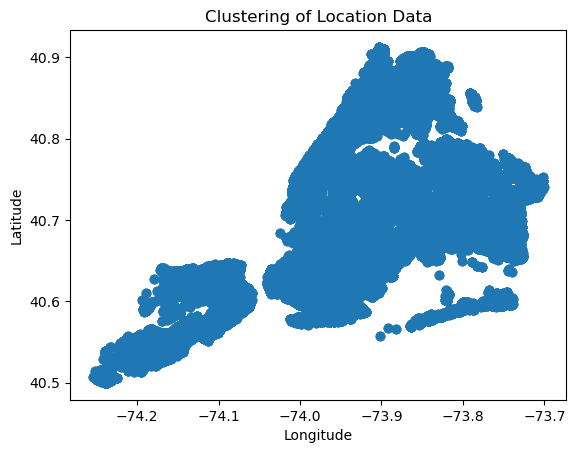

In [82]:
# Visualize the clusters
plt.scatter(data['longitude'], data['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Location Data')
plt.show()

### 3. Standardizing and Encoding data.

##### 1. Encoding

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [57]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the 'Category' column
encoded_data = encoder.fit_transform(data[['location type']])

# Get the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(['location type'])

# Create a DataFrame with the encoded data and feature names
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Display the encoded DataFrame
print(data)

C:\Users\Elsy\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                  location type  incident zip           city        borough  \
0         Other (Explain Below)       11432.0        JAMAICA         queens   
1         Other (Explain Below)       11432.0        JAMAICA         queens   
2         Other (Explain Below)       11432.0        JAMAICA         queens   
3       3+ Family Apt. Building       11375.0   FOREST HILLS         queens   
4       3+ Family Apt. Building       11375.0   FOREST HILLS         queens   
...                         ...           ...            ...            ...   
621586      Commercial Building       10306.0  STATEN ISLAND  staten island   
621587      Commercial Building       10306.0  STATEN ISLAND  staten island   
621588      Commercial Building       10306.0  STATEN ISLAND  staten island   
621589      Commercial Building       10306.0  STATEN ISLAND  staten island   
621590      Commercial Building       10306.0  STATEN ISLAND  staten island   

        x coordinate (state plane)  y coordinate (s

In [58]:
#2. Encoding borough
# Encode categorical column using LabelEncoder
encoder = LabelEncoder()
data['borough'] = encoder.fit_transform(data['borough'])

# Display the encoded DataFrame
print(data)

                  location type  incident zip           city  borough  \
0         Other (Explain Below)       11432.0        JAMAICA        3   
1         Other (Explain Below)       11432.0        JAMAICA        3   
2         Other (Explain Below)       11432.0        JAMAICA        3   
3       3+ Family Apt. Building       11375.0   FOREST HILLS        3   
4       3+ Family Apt. Building       11375.0   FOREST HILLS        3   
...                         ...           ...            ...      ...   
621586      Commercial Building       10306.0  STATEN ISLAND        4   
621587      Commercial Building       10306.0  STATEN ISLAND        4   
621588      Commercial Building       10306.0  STATEN ISLAND        4   
621589      Commercial Building       10306.0  STATEN ISLAND        4   
621590      Commercial Building       10306.0  STATEN ISLAND        4   

        x coordinate (state plane)  y coordinate (state plane)   latitude  \
0                        1039647.0            

In [59]:
#3. Encoding age group
# Encode categorical column using LabelEncoder
encoder = LabelEncoder()
data['age group'] = encoder.fit_transform(data['age group'])

# Display the encoded DataFrame
print(data)

                  location type  incident zip           city  borough  \
0         Other (Explain Below)       11432.0        JAMAICA        3   
1         Other (Explain Below)       11432.0        JAMAICA        3   
2         Other (Explain Below)       11432.0        JAMAICA        3   
3       3+ Family Apt. Building       11375.0   FOREST HILLS        3   
4       3+ Family Apt. Building       11375.0   FOREST HILLS        3   
...                         ...           ...            ...      ...   
621586      Commercial Building       10306.0  STATEN ISLAND        4   
621587      Commercial Building       10306.0  STATEN ISLAND        4   
621588      Commercial Building       10306.0  STATEN ISLAND        4   
621589      Commercial Building       10306.0  STATEN ISLAND        4   
621590      Commercial Building       10306.0  STATEN ISLAND        4   

        x coordinate (state plane)  y coordinate (state plane)   latitude  \
0                        1039647.0            

In [60]:
#4. Encoding city

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the 'Category' column
encoded_data = encoder.fit_transform(data[['city']])

# Get the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(['city'])

# Create a DataFrame with the encoded data and feature names
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Display the encoded DataFrame
print(data)

C:\Users\Elsy\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                  location type  incident zip           city  borough  \
0         Other (Explain Below)       11432.0        JAMAICA        3   
1         Other (Explain Below)       11432.0        JAMAICA        3   
2         Other (Explain Below)       11432.0        JAMAICA        3   
3       3+ Family Apt. Building       11375.0   FOREST HILLS        3   
4       3+ Family Apt. Building       11375.0   FOREST HILLS        3   
...                         ...           ...            ...      ...   
621586      Commercial Building       10306.0  STATEN ISLAND        4   
621587      Commercial Building       10306.0  STATEN ISLAND        4   
621588      Commercial Building       10306.0  STATEN ISLAND        4   
621589      Commercial Building       10306.0  STATEN ISLAND        4   
621590      Commercial Building       10306.0  STATEN ISLAND        4   

        x coordinate (state plane)  y coordinate (state plane)   latitude  \
0                        1039647.0            

In [61]:
data.columns

Index(['location type', 'incident zip', 'city', 'borough',
       'x coordinate (state plane)', 'y coordinate (state plane)', 'latitude',
       'longitude', 'location', 'age group',
       ...
       'city_South Ozone Park', 'city_South Richmond Hill',
       'city_Springfield Gardens', 'city_Sunnyside', 'city_WHITESTONE',
       'city_WOODHAVEN', 'city_WOODSIDE', 'city_Whitestone', 'city_Woodhaven',
       'city_Woodside'],
      dtype='object', length=140)

In [62]:
# Droping columns with repeated infomation.
columns_to_drop = ['location type','city', 'borough','age group',]
data = data.drop(columns = columns_to_drop)

In [63]:
# Droping columns with repeated infomation.
columns_to_drop = ['location']
data = data.drop(columns = columns_to_drop)

#### 2. Standardizing

In [64]:

# Initialize the StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled array back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)


# Convert the values to float data type
data_scaled = data_scaled.astype(float)

# Display the standardized DataFrame
print("\nStandardized DataFrame:")
print(data_scaled)



Standardized DataFrame:
        incident zip  x coordinate (state plane)  y coordinate (state plane)  \
0           1.236664                    2.027308                   -0.439968   
1           1.236664                    2.027308                   -0.439968   
2           1.236664                    2.027308                   -0.439968   
3           1.134568                    1.303869                   -0.158683   
4           1.134568                    1.303869                   -0.158683   
...              ...                         ...                         ...   
621586     -0.780176                   -2.620728                   -2.089218   
621587     -0.780176                   -2.620728                   -2.089218   
621588     -0.780176                   -2.620728                   -2.089218   
621589     -0.780176                   -2.620728                   -2.089218   
621590     -0.780176                   -2.620728                   -2.089218   

        latitu

## 4. Model training and testing.

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [66]:
data.columns

Index(['incident zip', 'x coordinate (state plane)',
       'y coordinate (state plane)', 'latitude', 'longitude',
       '2010 population', '2020 population', '2030 population',
       'change in number - 2010-2020', 'change in number - 2020-2030 ',
       ...
       'city_South Ozone Park', 'city_South Richmond Hill',
       'city_Springfield Gardens', 'city_Sunnyside', 'city_WHITESTONE',
       'city_WOODHAVEN', 'city_WOODSIDE', 'city_Whitestone', 'city_Woodhaven',
       'city_Woodside'],
      dtype='object', length=135)

In [67]:
# selecting data for clustering
loc_data = data_scaled[['2010 population', '2020 population', '2030 population','change in number - 2010-2020', 
             'change in number - 2020-2030 ','Minutes']]

In [71]:
# Perform clustering using K-means algorithm

k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(loc_data)

# Add cluster labels to the original dataset
labels = kmeans.labels_
data_scaled['Cluster'] = labels
# Display the clusters and associated data
for cluster_id in range(k):
    cluster_data = data_scaled[data_scaled['Cluster'] == cluster_id]
    print(f'Cluster {cluster_id + 1}:')
    print(cluster_data)
    print()


C:\Users\Elsy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
        incident zip  x coordinate (state plane)  y coordinate (state plane)  \
1           1.236664                    2.027308                   -0.439968   
2           1.236664                    2.027308                   -0.439968   
4           1.134568                    1.303869                   -0.158683   
5           1.134568                    1.303869                   -0.158683   
7           1.138151                    0.383728                    0.194542   
...              ...                         ...                         ...   
621576     -0.785550                   -3.268130                   -1.369436   
621579     -0.773012                   -2.803619                   -1.319077   
621582     -0.765847                   -3.273384                   -1.516011   
621585     -0.780176                   -2.620728                   -2.089218   
621588     -0.780176                   -2.620728                   -2.089218   

        latitude  longitude 

#### visualization of the data after clustering

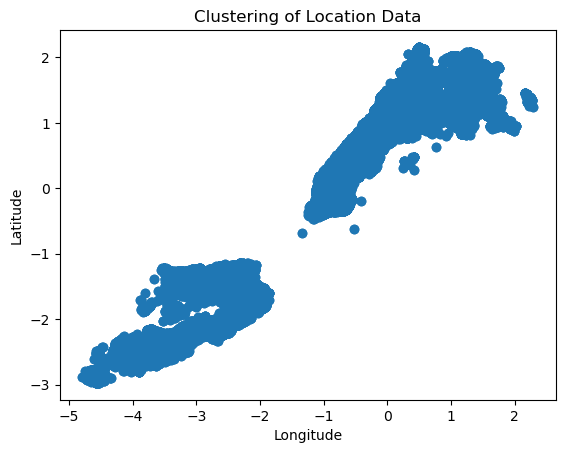

In [84]:
# Visualize the clusters
plt.scatter(cluster_data['longitude'], cluster_data['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Location Data')
plt.show()